In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as  sns

In [3]:
df = pd.read_csv("sales_data_with_discounts.csv")

In [4]:
df

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770
...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,15-04-2021,Thursday,L06,C,2,Lifestyle,Jeera,M-Casuals,1300,2600,15.475687,402.367873,2197.632127
446,15-04-2021,Thursday,L07,C,6,Lifestyle,Viva,W-Western,2600,15600,17.057027,2660.896242,12939.103758
447,15-04-2021,Thursday,L08,C,2,Lifestyle,Viva,W-Lounge,1600,3200,18.965550,606.897606,2593.102394
448,15-04-2021,Thursday,L09,C,3,Lifestyle,Jeera,M-Formals,1900,5700,16.793014,957.201826,4742.798174


In [5]:
df.isnull()

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,False,False,False,False,False,False,False,False,False,False,False,False,False
446,False,False,False,False,False,False,False,False,False,False,False,False,False
447,False,False,False,False,False,False,False,False,False,False,False,False,False
448,False,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
df.isnull().sum()

Date                 0
Day                  0
SKU                  0
City                 0
Volume               0
BU                   0
Brand                0
Model                0
Avg Price            0
Total Sales Value    0
Discount Rate (%)    0
Discount Amount      0
Net Sales Value      0
dtype: int64

In [9]:
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

# Basic statistics
desc_stats = df[numerical_cols].describe().T
mode_vals = df[numerical_cols].mode().iloc[0]
desc_stats['mode'] = mode_vals
print("\nBasic Statistical Measures:")
print(desc_stats[['mean', '50%', 'mode', 'std']].rename(columns={'50%': 'median'}))


Basic Statistical Measures:
                           mean       median          mode           std
Volume                 5.066667     4.000000      3.000000      4.231602
Avg Price          10453.433333  1450.000000    400.000000  18079.904840
Total Sales Value  33812.835556  5700.000000  24300.000000  50535.074173
Discount Rate (%)     15.155242    16.577766      5.007822      4.220602
Discount Amount     3346.499424   988.933733     69.177942   4509.902963
Net Sales Value    30466.336131  4677.788059    326.974801  46358.656624


In [10]:
import warnings
warnings.filterwarnings('ignore')


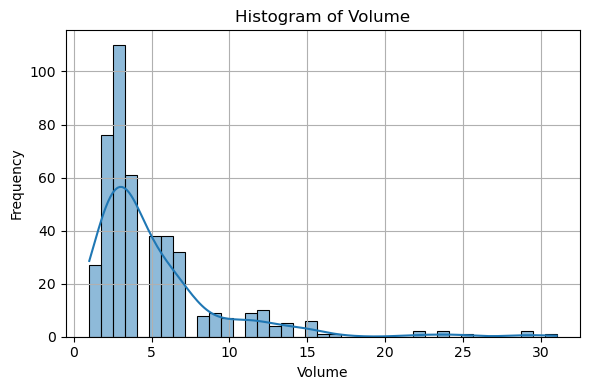

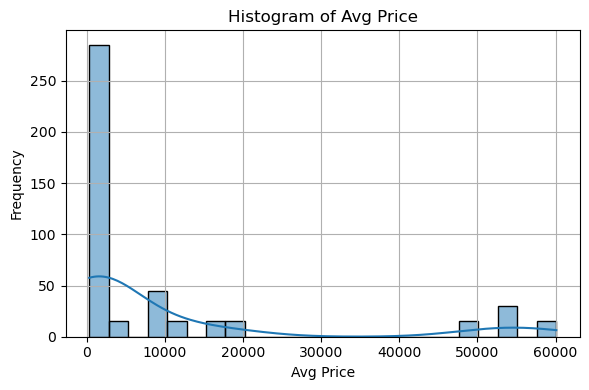

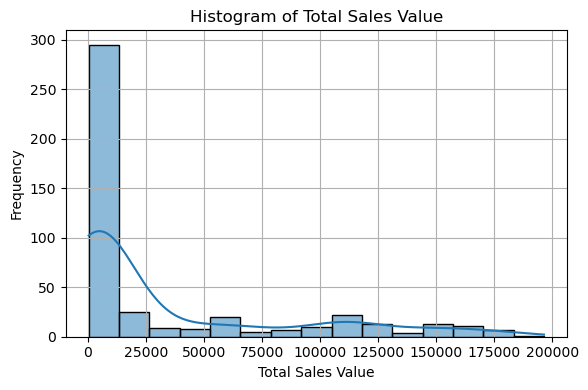

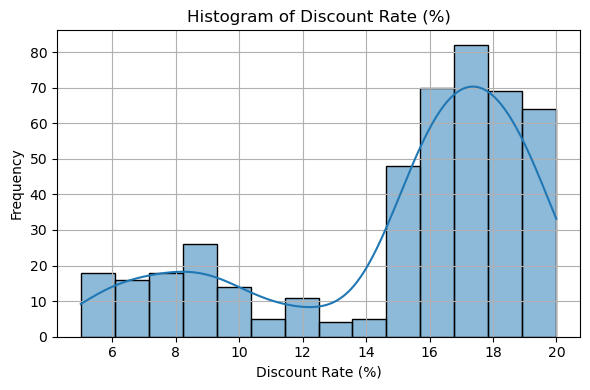

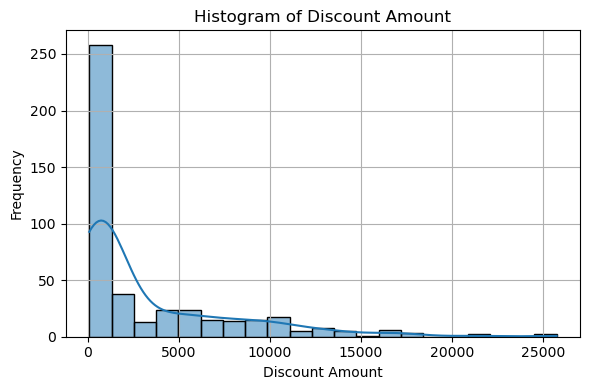

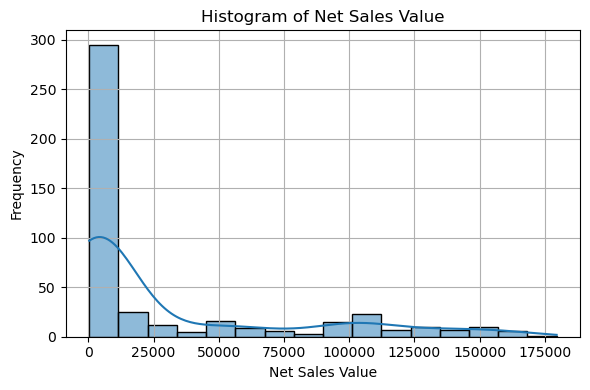

In [11]:
# Histograms
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

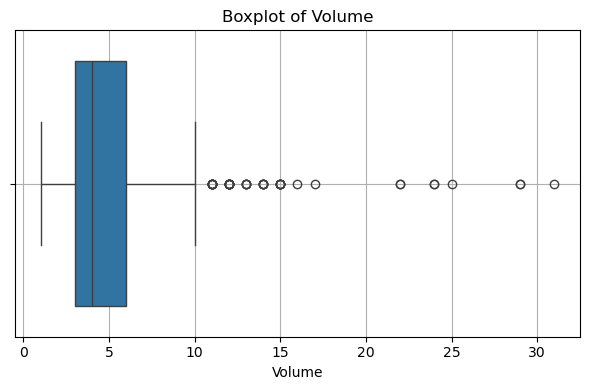

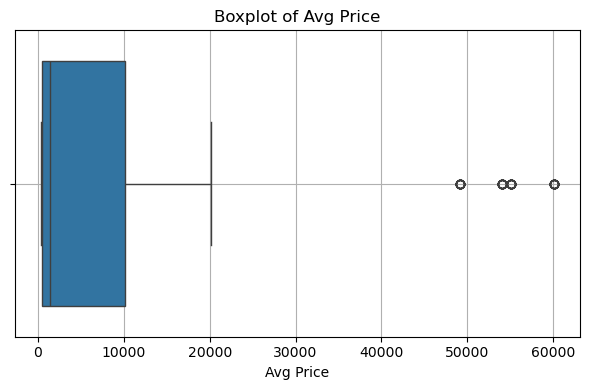

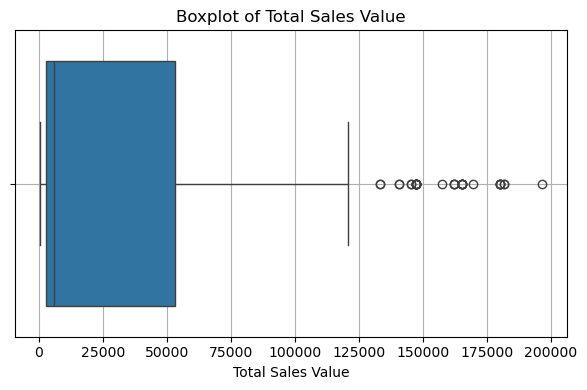

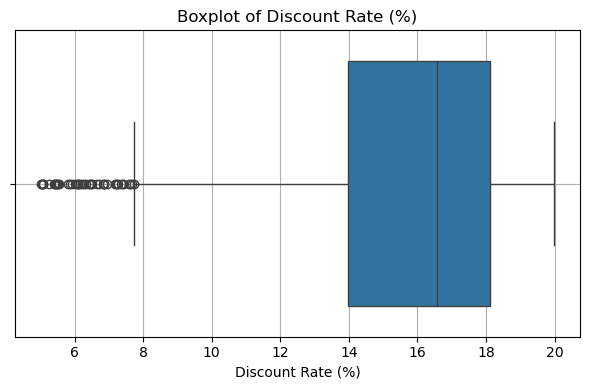

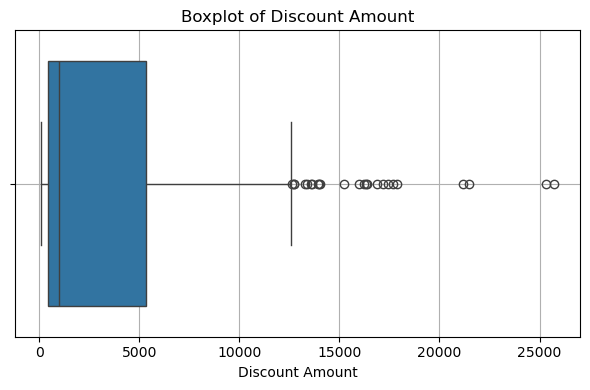

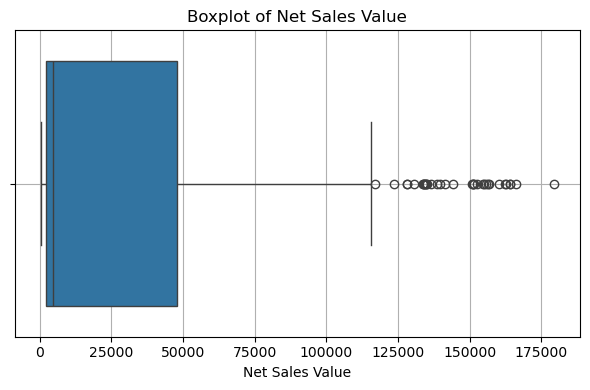

In [12]:
# Boxplots
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


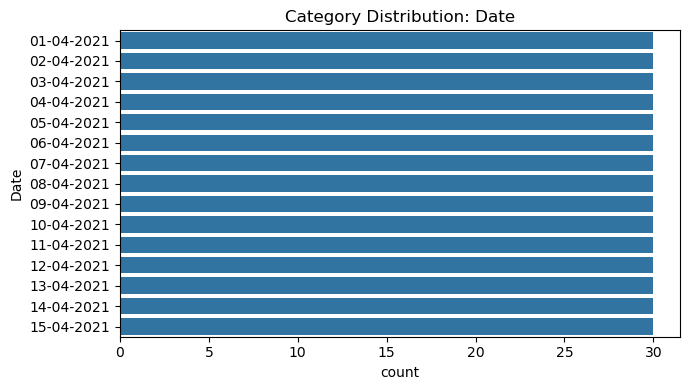

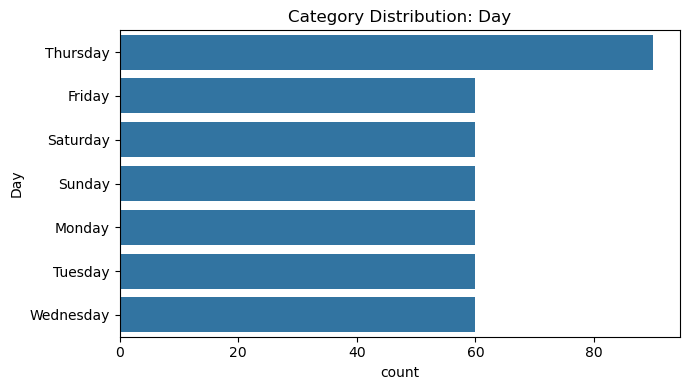

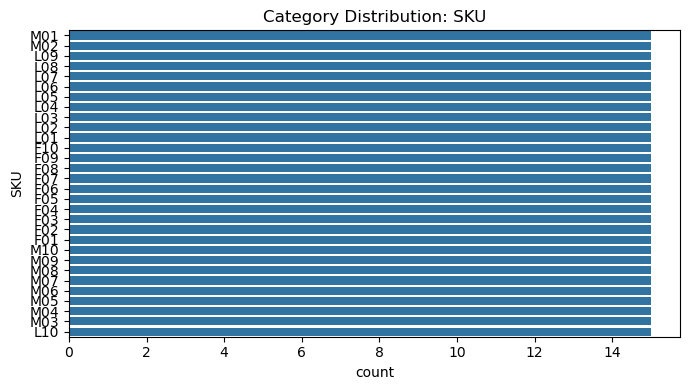

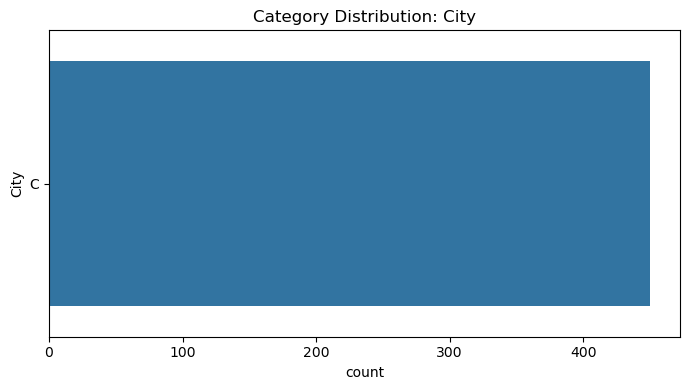

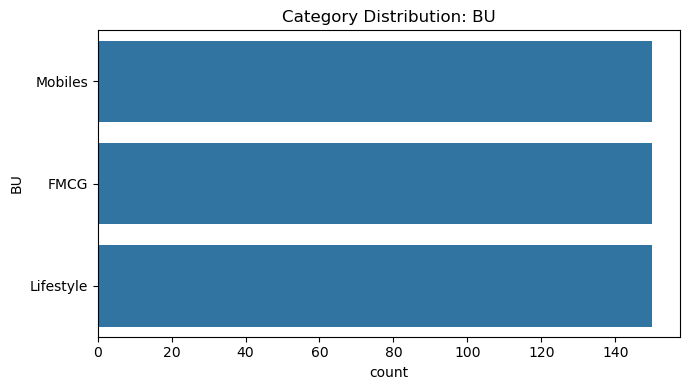

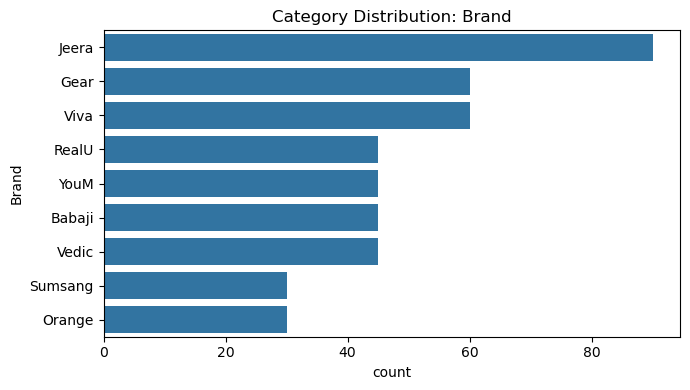

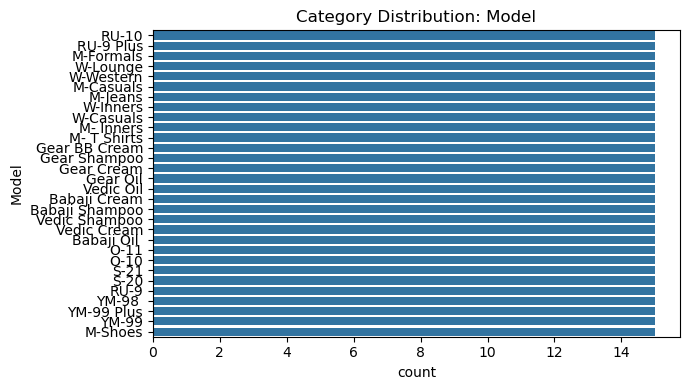

In [13]:
# Bar Chart for Categorical Columns
categorical_cols = df.select_dtypes(include='object').columns.tolist()

for col in categorical_cols:
    plt.figure(figsize=(7, 4))
    sns.countplot(y=col, data=df, order=df[col].value_counts().index)
    plt.title(f"Category Distribution: {col}")
    plt.tight_layout()
    plt.show()


In [21]:
# Standardization

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_standardized = df.copy()
df_standardized[numerical_cols] = scaler.fit_transform(df[numerical_cols])


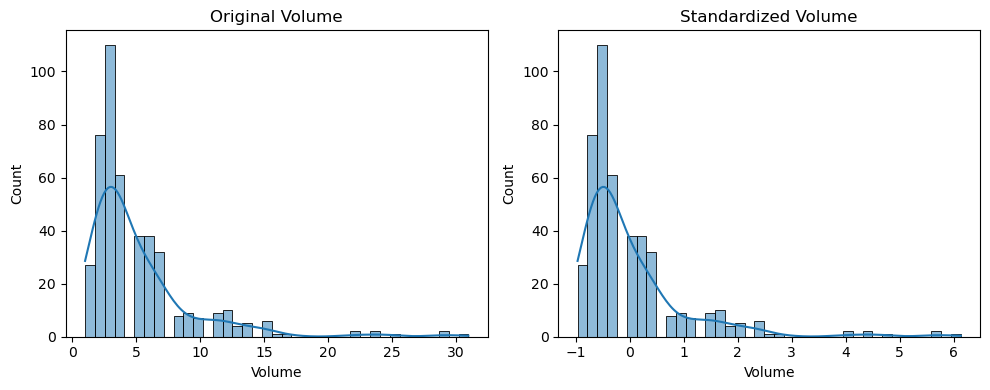

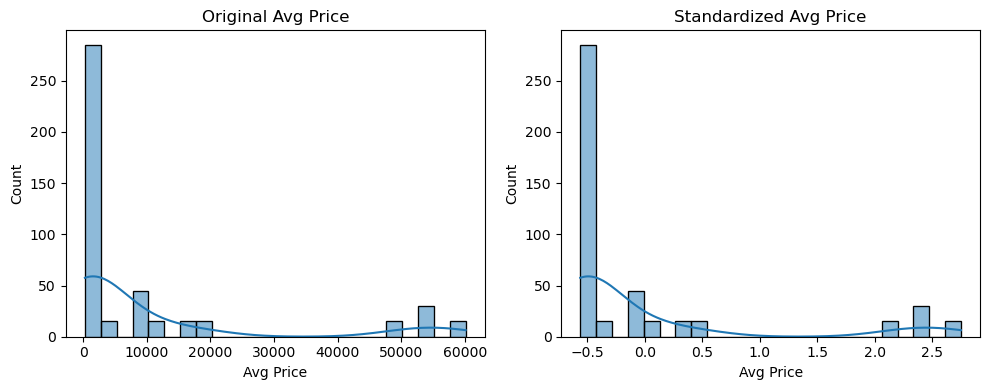

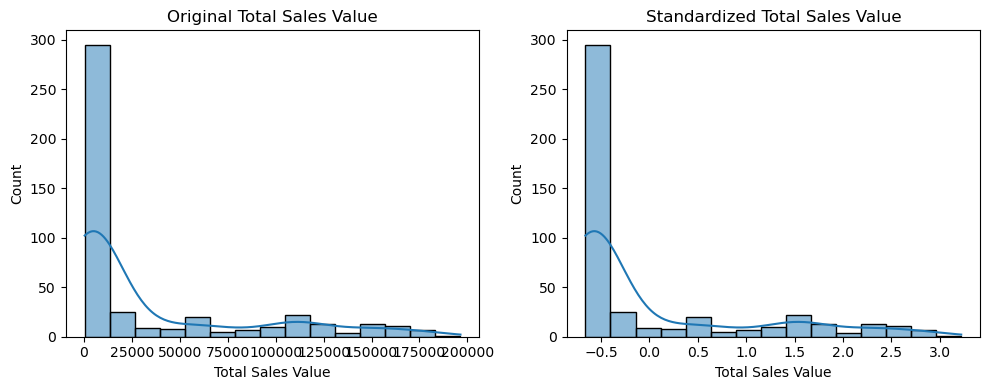

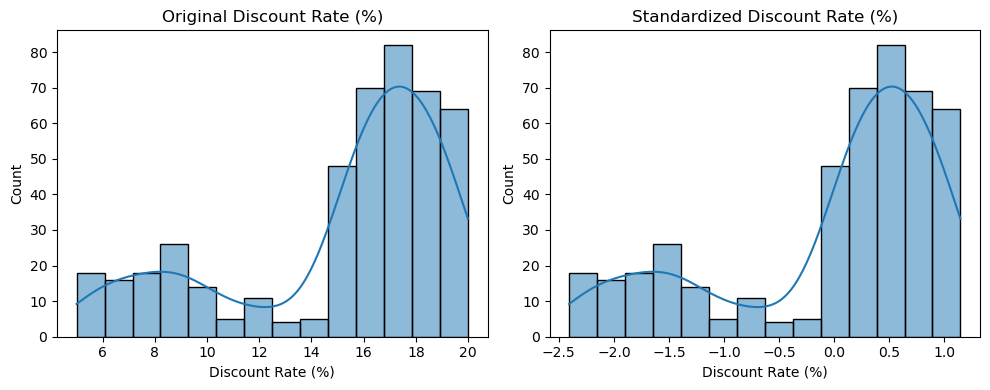

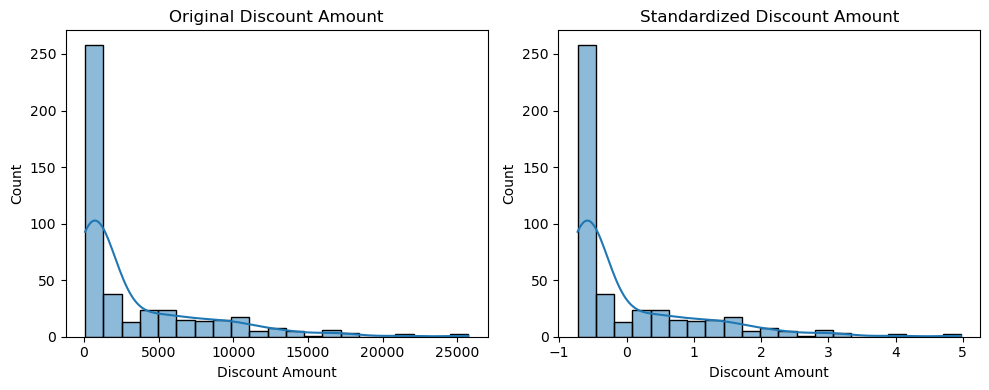

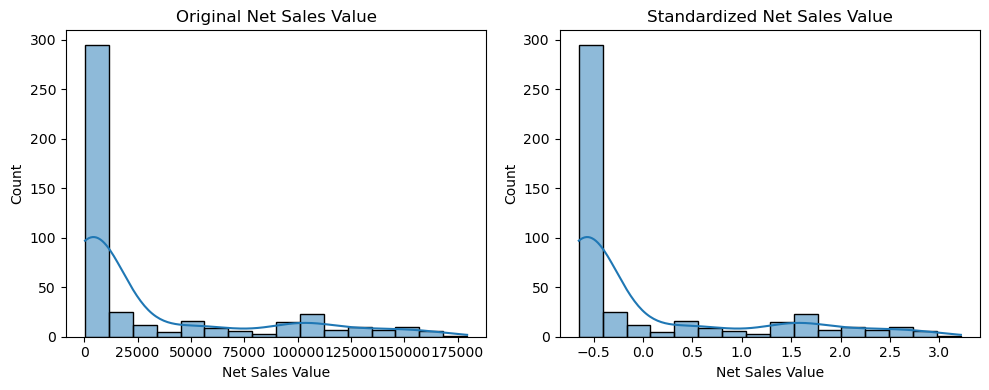

In [17]:
for col in numerical_cols:
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))
    sns.histplot(df[col], ax=axes[0], kde=True)
    axes[0].set_title(f"Original {col}")
    sns.histplot(df_standardized[col], ax=axes[1], kde=True)
    axes[1].set_title(f"Standardized {col}")
    plt.tight_layout()
    plt.show()

In [18]:
df_encoded = pd.get_dummies(df, columns=categorical_cols)
print("\nSample of One-hot Encoded Data:")
print(df_encoded.head())


Sample of One-hot Encoded Data:
   Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0      15      12100             181500          11.654820     21153.498820   
1      10      10100             101000          11.560498     11676.102961   
2       7      16100             112700           9.456886     10657.910157   
3       6      20100             120600           6.935385      8364.074702   
4       3       8100              24300          17.995663      4372.946230   

   Net Sales Value  Date_01-04-2021  Date_02-04-2021  Date_03-04-2021  \
0    160346.501180             True            False            False   
1     89323.897039             True            False            False   
2    102042.089843             True            False            False   
3    112235.925298             True            False            False   
4     19927.053770             True            False            False   

   Date_04-04-2021  ...  Model_Vedic Cream  Model_Ved

In [19]:
print("""
Conclusion:
- Basic statistics helped identify the center, spread, and most common values for numerical data.
- Visualizations revealed data skewness, presence of outliers, and category distributions.
- Standardization normalized numerical features to a mean of 0 and std deviation of 1.
- One-hot encoding transformed categorical variables to numerical format suitable for ML models.
""")


Conclusion:
- Basic statistics helped identify the center, spread, and most common values for numerical data.
- Visualizations revealed data skewness, presence of outliers, and category distributions.
- Standardization normalized numerical features to a mean of 0 and std deviation of 1.
- One-hot encoding transformed categorical variables to numerical format suitable for ML models.

